In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset
df = pd.read_csv("hospital_readmission_decision_tree_dataset.csv")

In [3]:
# seeing 1st 5 row
df.head()

,Age,Blood_Pressure,BMI,Diabetes,Days_Admitted,Previous_Visits,Chronic_Disease,Readmitted
0,69,188.0,NaN,No,5,2,Yes,No
1,32,100.0,NaN,Yes,5,2,Yes,No
2,89,102.0,23.0,Yes,20,0,No,No
3,78,186.0,23.4,Yes,15,2,No,No
4,38,198.0,29.0,No,18,1,No,No


In [4]:
#seeing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              800 non-null    int64  
 1   Blood_Pressure   680 non-null    float64
 2   BMI              694 non-null    float64
 3   Diabetes         800 non-null    object 
 4   Days_Admitted    800 non-null    int64  
 5   Previous_Visits  800 non-null    int64  
 6   Chronic_Disease  800 non-null    object 
 7   Readmitted       800 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [5]:
#seeing dataset shape
df.shape

(800, 8)

In [6]:
#seeing duplicated
df.duplicated().sum()

np.int64(0)

In [7]:
#seeing NAN value
df.isna().sum()

Age                  0
Blood_Pressure     120
BMI                106
Diabetes             0
Days_Admitted        0
Previous_Visits      0
Chronic_Disease      0
Readmitted           0
dtype: int64

Visualization

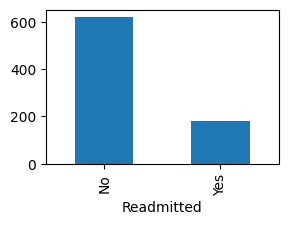

In [8]:
plt.figure(figsize=(3,2))
df['Readmitted'].value_counts().plot(kind='bar')
plt.show()

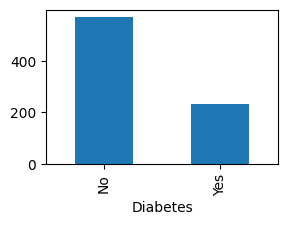

In [9]:
plt.figure(figsize=(3,2))
df['Diabetes'].value_counts().plot(kind='bar')
plt.show()

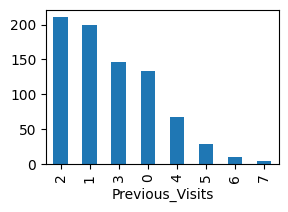

In [10]:
plt.figure(figsize=(3,2))
df['Previous_Visits'].value_counts().plot(kind='bar')
plt.show()

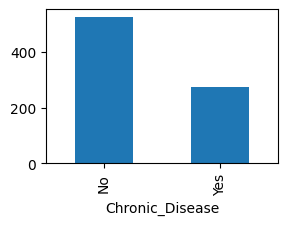

In [11]:
plt.figure(figsize=(3,2))
df['Chronic_Disease'].value_counts().plot(kind='bar')
plt.show()

In [12]:
sel_col = df[['Age', 'Blood_Pressure', 'BMI', 'Days_Admitted']]

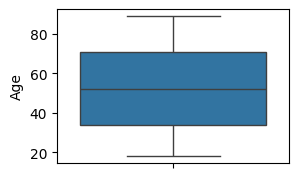

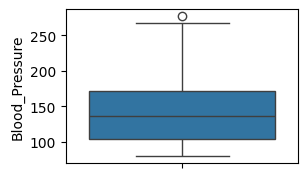

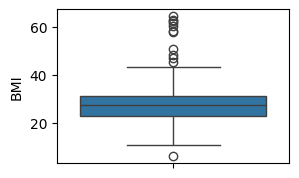

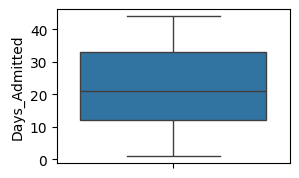

In [13]:
for col in sel_col:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col])
    plt.show()

In [18]:
outlierCount = {}
for col2 in df.select_dtypes(include='number').columns:
    q1 = df[col2].quantile(.25)
    q3 = df[col2].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    counts = (df[col2] < low_wh) | (df[col2] > up_wh)
    outlierCount[col2] = counts.sum()

outlier_df = pd.DataFrame(
    {
        'columns': outlierCount.keys(),
        'Outlier_counts': outlierCount.values()
    }
)
outlier_df

,columns,Outlier_counts
0,Age,0
1,Blood_Pressure,1
2,BMI,12
3,Days_Admitted,0
4,Previous_Visits,4


In [25]:
def outlier(df, col3):
    q1 = df[col3].quantile(.25)
    q3 = df[col3].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    return df[(df[col3] >= low_wh) & (df[col3] <= up_wh)]

In [26]:
sel_col = df[['BMI', 'Previous_Visits']]

In [27]:
df_clean = df.copy()

In [28]:
for col4 in sel_col:
    df_clean = outlier(df_clean, col4)

In [29]:
df = df_clean.copy()

In [30]:
outlierCount = {}
for col2 in df.select_dtypes(include='number').columns:
    q1 = df[col2].quantile(.25)
    q3 = df[col2].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    counts = (df[col2] < low_wh) | (df[col2] > up_wh)
    outlierCount[col2] = counts.sum()

outlier_df = pd.DataFrame(
    {
        'columns': outlierCount.keys(),
        'Outlier_counts': outlierCount.values()
    }
)
outlier_df

,columns,Outlier_counts
0,Age,0
1,Blood_Pressure,1
2,BMI,0
3,Days_Admitted,0
4,Previous_Visits,0
